<a href="https://colab.research.google.com/github/azimjaan21/Multiple_Linear_Regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Starting with the Dataset

In [ ]:
df = pd.read_csv('housing_LR.csv')
df.head(10)

,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Юнусабадский,3,57.0,4,4,52000.0
1,1,Яккасарайский,2,52.0,4,5,56000.0
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0
5,5,Чиланзарский,1,28.0,1,4,25500.0
6,6,Чиланзарский,1,30.0,2,4,21200.0
7,7,Яккасарайский,2,32.0,5,5,20000.0
8,8,Учтепинский,2,51.0,3,4,26200.0
9,9,Чиланзарский,1,30.0,1,4,22200.0


In [ ]:
#Selecting specific district to predict Home Prices

housing = df[df['district'] == 'Юнусабадский']
housing

,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Юнусабадский,3,57.00,4,4,52000.0
44,44,Юнусабадский,3,70.00,3,4,47000.0
72,72,Юнусабадский,2,40.00,1,9,40000.0
74,74,Юнусабадский,2,53.00,1,9,68000.0
77,77,Юнусабадский,4,82.00,1,4,86000.0
...,...,...,...,...,...,...,...
7220,7407,Юнусабадский,2,54.00,2,5,39000.0
7245,7432,Юнусабадский,4,107.00,5,5,45000.0
7251,7438,Юнусабадский,2,58.00,2,4,40000.0
7252,7439,Юнусабадский,3,137.00,5,9,86000.0


In [ ]:
housing.describe()

,Unnamed: 0,rooms,size,level,max_levels,price
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,3698.127509,2.636364,72.095797,3.468713,5.665880,56106.641086
std,2091.499356,1.027977,27.845784,2.064252,2.251987,27261.895508
min,0.000000,1.000000,18.000000,1.000000,2.000000,12500.000000
25%,2051.500000,2.000000,55.000000,2.000000,4.000000,38000.000000
50%,3537.000000,2.000000,67.000000,3.000000,4.000000,49000.000000
75%,5272.500000,3.000000,83.000000,4.000000,9.000000,68000.000000
max,7444.000000,7.000000,279.000000,11.000000,13.000000,203000.000000


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 0 to 7257
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  847 non-null    int64  
 1   district    847 non-null    object 
 2   rooms       847 non-null    int64  
 3   size        847 non-null    float64
 4   level       847 non-null    int64  
 5   max_levels  847 non-null    int64  
 6   price       847 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 52.9+ KB


In [ ]:
housing

,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Юнусабадский,3,57.00,4,4,52000.0
44,44,Юнусабадский,3,70.00,3,4,47000.0
72,72,Юнусабадский,2,40.00,1,9,40000.0
74,74,Юнусабадский,2,53.00,1,9,68000.0
77,77,Юнусабадский,4,82.00,1,4,86000.0
...,...,...,...,...,...,...,...
7220,7407,Юнусабадский,2,54.00,2,5,39000.0
7245,7432,Юнусабадский,4,107.00,5,5,45000.0
7251,7438,Юнусабадский,2,58.00,2,4,40000.0
7252,7439,Юнусабадский,3,137.00,5,9,86000.0


# Train/Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Visual Analyzing between 'price' and others

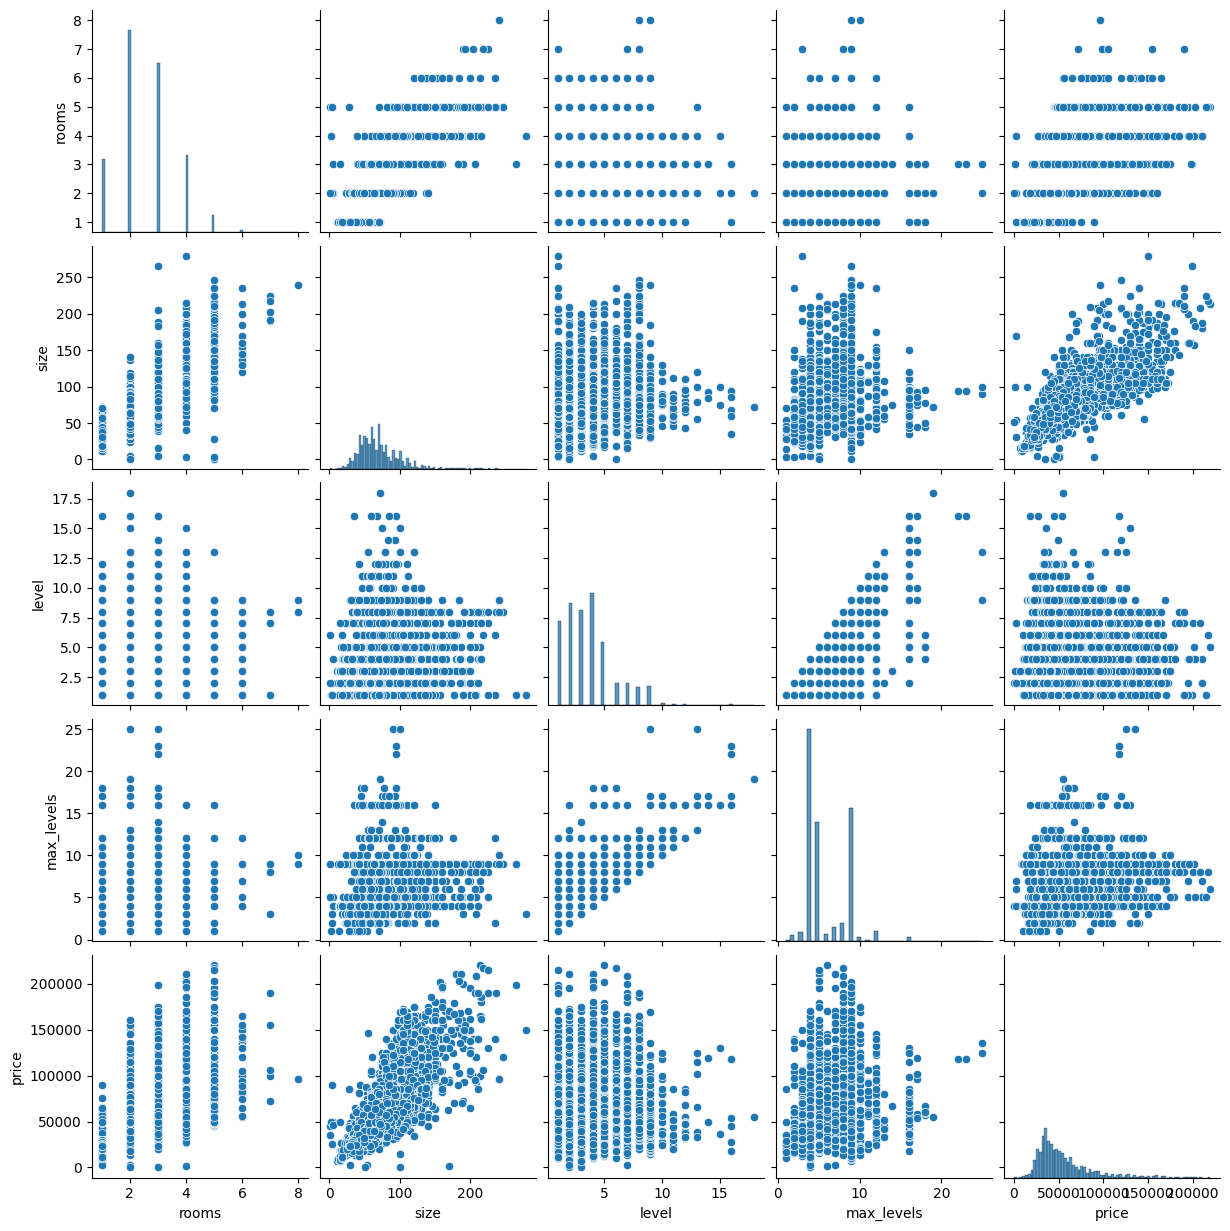

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(df[['rooms', 'size', 'level', 'max_levels', 'price']])
plt.show()

SUMMARY:

 'price' and 'size'(higher) and 'max_levels' also have correlation  after observing graphs.

# Machine Learning - MLR (Multiple Linear Regression)

In [13]:
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()

x_train = np.asanyarray(train_set[['size',  'max_levels']])
y_train = np.asanyarray(train_set[['price']])

MLR.fit(x_train, y_train)

LinearRegression()

In [15]:
# theta1 & theta0
print('theta1: ', MLR.coef_)
print('theta0: ', MLR.intercept_)

theta1:  [[ 773.39121807 -225.65818683]]
theta0:  [1786.61819705]


# ML Evaluation

In [16]:
x_test = np.asanyarray(test_set[['size',  'max_levels']])
y_test = np.asanyarray(test_set[['price']])

y_pred = MLR.predict(x_test)

In [17]:
# MAE & RMSE

from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print('MAE: ', MAE)
print('RMSE: ', RMSE)

MAE:  12248.398549055959
RMSE:  17343.48842446007
